In [1]:
import numpy as np
import dynamiqs as dq
import matplotlib.pyplot as plt

Task 1.1

|██████████| 100.0% ◆ elapsed 1.40s ◆ remaining 0.00ms     
100%|██████████| 50/50 [00:04<00:00, 10.83it/s]


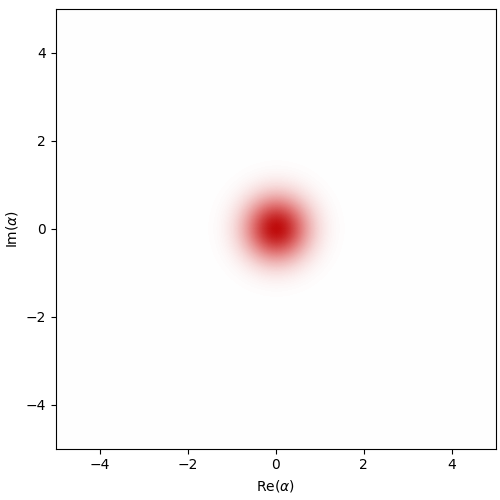

In [2]:
# Parameters
na = 20 # Hilbert space dimension
nb = 5
g2 = 1
epsilon_d = -4
kappa_b = 10

adag = dq.create(na)
a = dq.destroy(na)
a_id, id = dq.destroy(na, nb)
bdag = dq.create(nb)
b = dq.destroy(nb)
id, id_bdag = dq.create(na, nb)
H_2ph = g2 * dq.tensor(adag @ adag, b) + dq.dag(g2 * dq.tensor(adag @ adag, b))
H_d = epsilon_d * id_bdag + dq.dag(epsilon_d * id_bdag)

psi0 = dq.fock((na,nb), (0,0)) # initial state
H = H_2ph + H_d
# H = dq.zero(na)
kappa_2 = 1 # two-photon loss rate
alpha = 2.0 # cat size
tsave = np.linspace(0, 4, 100)
# print(a_id@a_id, dq.eye(na*nb))
# print(type(a_id@a_id))
# print(type(dq.eye(na*nb)))
loss_op = dq.asqarray(np.sqrt(kappa_b)*dq.dag(id_bdag), dims=(na,nb)) # loss operator
res = dq.mesolve(H, [loss_op], psi0, tsave)
dq.plot.wigner_gif(dq.ptrace(res.states, 0, (na,nb)))

Task 1.2

|██████████| 100.0% ◆ elapsed 2.89s ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:06<00:00,  7.54it/s]


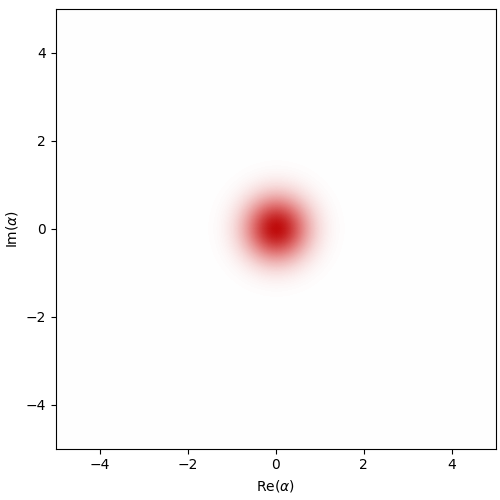

In [24]:
# Parameters
na = 20 # Hilbert space dimension
nb = 5

psi0 = dq.fock((na,nb), (0,0)) # initial state
H_0 = dq.zeros(na, nb)
kappa_2 = 1 # two-photon loss rate
alpha = 2.0 # cat size
tsave = np.linspace(0, 4, 100)
loss_op = dq.asqarray(np.sqrt(kappa_2)*(a_id @ a_id - alpha**2 * dq.eye(na, nb)), dims=(na,nb)) # loss operator
res_no_buffer = dq.mesolve(H_0, [loss_op], psi0, tsave)
dq.plot.wigner_gif(dq.ptrace(res_no_buffer.states, 0, (na,nb)))

Text(0, 0.5, 'Fidelity')

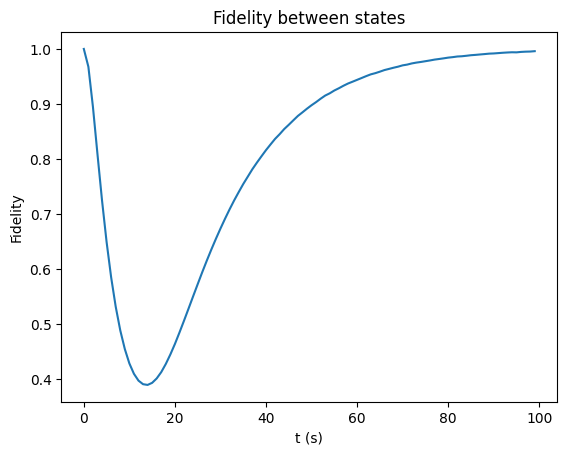

In [4]:
plt.plot(dq.fidelity(res.states, res_no_buffer.states))
plt.title("Fidelity between states")
plt.xlabel("t (s)")
plt.ylabel("Fidelity")

10


|██████████| 100.0% ◆ elapsed 1.01s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 2.89s ◆ remaining 0.00ms  


5


|██████████| 100.0% ◆ elapsed 858.76ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 3.05s ◆ remaining 0.00ms  


2


|██████████| 100.0% ◆ elapsed 1.39s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 3.81s ◆ remaining 0.00ms  


1


|██████████| 100.0% ◆ elapsed 1.51s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 3.82s ◆ remaining 0.00ms  


Text(0, 0.5, 'Fidelity')

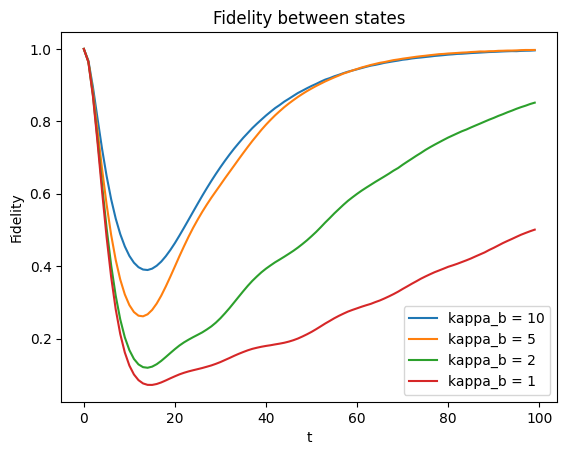

In [25]:
kappa_bs = [10, 5, 2, 1]
fidelities = []

for kb in kappa_bs:
    print(kb)
    loss_op_with_buffer = dq.asqarray(np.sqrt(kb)*dq.dag(id_bdag), dims=(na,nb)) # loss operator
    res_with_buffer = dq.mesolve(H_2ph + H_d, [loss_op_with_buffer], psi0, tsave)

    loss_op_no_buffer = dq.asqarray(np.sqrt(kappa_2)*(a_id @ a_id - alpha**2 * dq.eye(na,nb)), dims=(na,nb)) # loss operator
    res_no_buffer = dq.mesolve(H_0, [loss_op_no_buffer], psi0, tsave)

    fidelity = dq.fidelity(res_with_buffer.states, res_no_buffer.states)
    fidelities.append(fidelity)
    plt.plot(fidelity, label=f'kappa_b = {kb}')

# kb = 100
# for kb in kappa_bs:
#     loss_op_with_buffer = dq.asqarray(np.sqrt(kb) * dq.dag(id_bdag), dims=(na,nb))
#     res_with_buffer = dq.mesolve(H_2ph + H_d, [loss_op_with_buffer], psi0, tsave)

#     loss_op_no_buffer = dq.asqarray(np.sqrt(kappa_2) * (a_id @ a_id - alpha**2 * dq.eye(na,nb)), dims=(na,nb))
#     res_no_buffer = dq.mesolve(H_0, [loss_op_no_buffer], psi0, tsave)

#     plt.plot(dq.fidelity(res_with_buffer.states, res_no_buffer.states))
# plt.title("Fidelity between states")
# plt.xlabel("t (s)")
# plt.ylabel("Fidelity")

plt.legend()
plt.title("Fidelity between states")
plt.xlabel("t")
plt.ylabel("Fidelity")